# Ch3 - 4 excel 데이터 불러오기 및 내보내기  

read_csv와 유사하다. 다만 시트라는 개념때문에 다른 점이 있다.  

**.xlsx 포맷의 데이터**를 불러오는데 효과적인 함수이다.  
```
pd.read_excel(filepath, sheet_name, header, index_col, usecols, parse_dates, nrows, skiprows)
```  
filepath : 파일 경로 및 이름  
sheet_name : 불러오고자 하는 시트 이름 및 위치, 지정하지 않으면 맨 앞의 시트만 불러오게 된다.  
header : 헤더의 위치로 None을 입력하면 컬럼명이 0, 1, 2 로 자동 부여된다. (default: 'infer')  
index_col : 인덱스의 위치  
usecols : 사용할 컬럼 목록 및 위치 목록  
parse_dates :   
nrows : 불러올 행의 개수
skiprows : 불러오지 않을 행의 위치(리스트) - 엑셀데이터는 데이터 자체를 불러오는 것보다 가공한 결과를 저장하는 경우가 더 많다. 그래서 일부 디자인을 위해 들어가는 행이 존재한다. 그래서 우리가 원하는 위치부터 데이터를 불러올 수 있도록 하는 파라미터.  


## 경로 설정하기

In [1]:
import os
import pandas as pd
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/1. 데이터 핸들링/데이터")

## read_excel을 사용한 데이터 불러오기 

많은 엑셀 파일은 맨 처음 시트는 뒤의 시트들의 요약정보를 가지고 있는 경우가 많기 때문에 잊지 말고 지정할 필요가 있다.  



In [2]:
# 시트를 정의하지 않으면, 첫 번째 시트만 지정됨 
df = pd.read_excel("data_reading.xlsx")
df

,첫번째 시트,값없음
0,첫번째 시트,값없음


In [3]:
# 시트를 지정하면 해당 시트를 가져옴
df = pd.read_excel("data_reading.xlsx", sheet_name = 'target_sheet')
df.head()

,Col1,Col2,Col3,Col4,Col5
0,0.188888,0.161053,0.150413,0.824770,0.111833
1,0.827719,0.161363,0.400331,0.398196,0.770696
2,0.844660,0.100998,0.995176,0.615525,0.878389
3,0.913895,0.036169,0.237840,0.187628,0.534308
4,0.322443,0.955010,0.340765,0.649311,0.354540


## 필요한 부분의 데이터 불러오기 (중요)

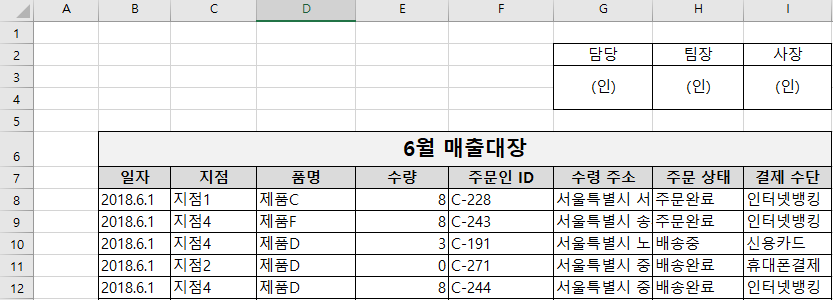

In [6]:
# 1~6 즉 0~5를 데려오지 않는다.
df = pd.read_excel('월별매출데이터.xlsx', sheet_name = '6월', skiprows = range(6))
# 값이 없는 첫 번째 열을 제거. 물론 usecol을사용해서 B~I만 가져올 수도 있다.
df = df.iloc[:, 1:] 

df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.6.1,지점1,제품C,8,C-228,서울특별시 서대문구 홍제동,주문완료,인터넷뱅킹
1,2018.6.1,지점4,제품F,8,C-243,서울특별시 송파구 마천동,주문완료,인터넷뱅킹
2,2018.6.1,지점4,제품D,3,C-191,서울특별시 노원구 월계동,배송중,신용카드
3,2018.6.1,지점2,제품D,0,C-271,서울특별시 중구 회현동3가,배송완료,휴대폰결제
4,2018.6.1,지점4,제품D,8,C-244,서울특별시 중구 서소문동,배송완료,인터넷뱅킹


# 데이터 저장하기

판다스의 to_excel 함수는 테이블 형태의 데이터를 저장하는데 효과적인 함수이다.  
시트가 여러가지 있을 수 있다는 점이 csv와 다른 점임을 기억하기.  


```
df.to_excel(filepath, index, sheet_name, mode)
```  
filepath : 파일 경로 및 이름  
index : 인덱스를 저장할지 여부  
sheet_name : 시트명  

여러 데이터 프레임이 있고, 한 파일에 여러 시트를 생성해야 하는 경우에는 **ExcelWriter**를 사용한다.  
```
writer = pd.ExcelWriter(xlsx file)
df1.to_excel(writer, sheet_name = "sheet1")
df2.to_excel(writer, sheet_name = "sheet2")
```  
    xlsx file는 존재하는 파일이어도 되고, 아니어도 된다. 존재하는 파일이면 시트가 추가되는 방식으로 저장된다.


## to_excel을 사용한 데이터 저장

In [7]:
df1 = pd.DataFrame({"A":[1,2,3,4], "B":[5,6,7,8]})
df2 = pd.DataFrame({"A":[9,10,11,12], "B":[13,14,15,16]})

In [8]:
with pd.ExcelWriter('written_excel.xlsx') as writer:
    df1.to_excel(writer, sheet_name = 'First')
    df2.to_excel(writer, sheet_name = 'Second')